# Import the csv data as a Dataframe 

In [1]:
import pandas as pd 
df=pd.read_csv("data/stud.csv")

### showing the Top 5 records

In [2]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### shape of the Dataset 

In [3]:
df.shape

(1000, 8)

##### conclusion : Therefore this dataframe has 1000 rows and * columns

### Check the missing values

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### conclusion : There are no missing values in this Dataframe

### check for duplicates

In [5]:
df.duplicated().sum()

0

##### Conclsuion : There are zero duplicate elememets presentin this Dataframe 

### check the Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Conclusion : There are totally 5 Objective data and 3 integer data 

### Check the No:of unique values of each column

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check the statistics of the Dataset

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
- From above description of numerical data, all means are very close to each other between 66 and 68.05
- All standard deviations are also close - between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### Exploring Data

In [9]:
print("categories in 'gender' variable is :  ",end=" ")
print(df["gender"].unique())
print("categories in 'race/ethnicity' variable is :  ",end=" ")
print(df["race/ethnicity"].unique())
print("categories in 'parental level of education' variable is :  ",end=" ")
print(df["parental level of education"].unique())
print("Categories in 'lunch' variable is : ",end=" ")
print(df["lunch"].unique())
print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

categories in 'gender' variable is :   ['female' 'male']
categories in 'race/ethnicity' variable is :   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable is :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable is :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


### Defining numerical and categorical columns 

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# printing thenumerical and categorical data 
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns "Total Score" and "Average" for the current dataframe 

In [11]:
df["Total score"]=df["math score"]+df["reading score"]+df["writing score"]
df["Average"]=df["Total score"]/3

In [12]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### We got Total score and Average for every row 

In [13]:
reading_full=df[df["reading score"]==100]['Average'].count()
writing_full=df[df["writing score"]==100]["Average"].count()
math_full=df[df["math score"]==100]["Average"].count()

print(f"Number of students with full marks in Maths :{math_full}")
print(f"Number od students with full marks in Reading :{reading_full}")
print(f"Number of students with full marks in Writing :{writing_full}")

Number of students with full marks in Maths :7
Number od students with full marks in Reading :17
Number of students with full marks in Writing :14


In [14]:
reading_20=df[df["reading score"]<=20]["Average"].count()
writing_20=df[df["writing score"]<=20]["Average"].count()
math_20=df[df["math score"]<=20]["Average"].count()

print(f"Number of student with less than 20 marks in reading :{reading_20}")
print(f"Number of student with less than 20 marks in writing :{writing_20}")
print(f"Number of student with less than 20 marks in maths :{math_20}")

Number of student with less than 20 marks in reading :1
Number of student with less than 20 marks in writing :3
Number of student with less than 20 marks in maths :4


### Insights
- From the above values we get the students has performed worst in math
- and the students has performed good in reading

# Exploring data (visualization)

### visualize average score to make some conlusions
- Histogram 
- Kernel Distribution function(KDE)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Average', ylabel='Count'>

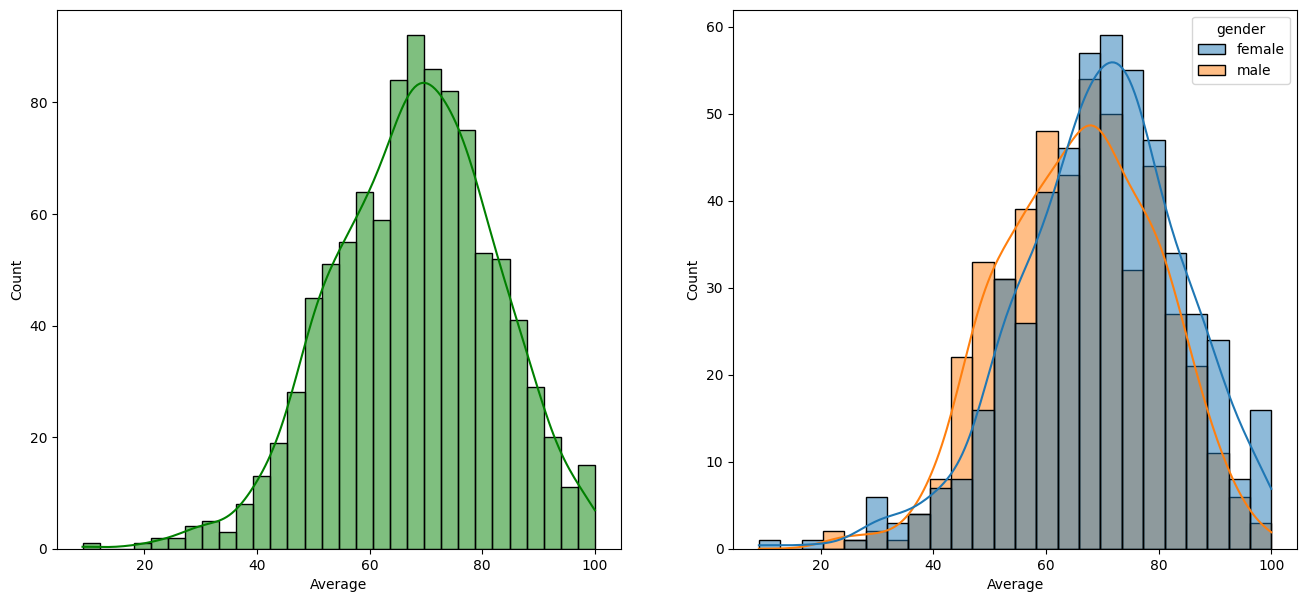

In [16]:
fig,axs=plt.subplots(1,2,figsize=(16,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x="Average",bins=30,kde=True,color="green")
plt.subplot(1,2,2)
sns.histplot(data=df,x="Average",kde=True,hue="gender")

# Insights 
- female students tend to perform well compared to male students 

<Axes: xlabel='Average', ylabel='Count'>

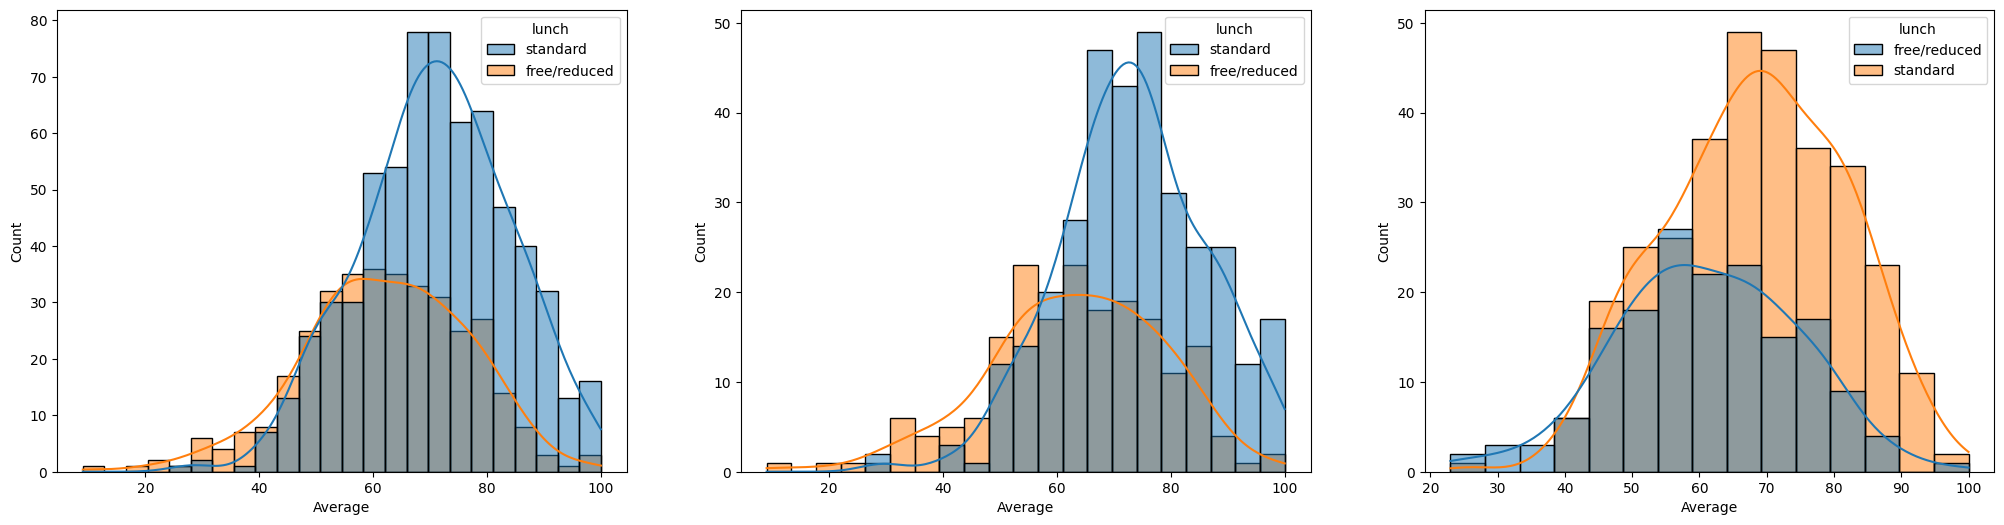

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="Average",kde=True,hue="lunch")
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=="male"],x="Average",kde=True,hue="lunch")

# Insights
- Standard lunch helps to perform well in exam 
- Standard lunch helps to perform well in exam wheather it may be male or female 

<Axes: xlabel='Average', ylabel='Count'>

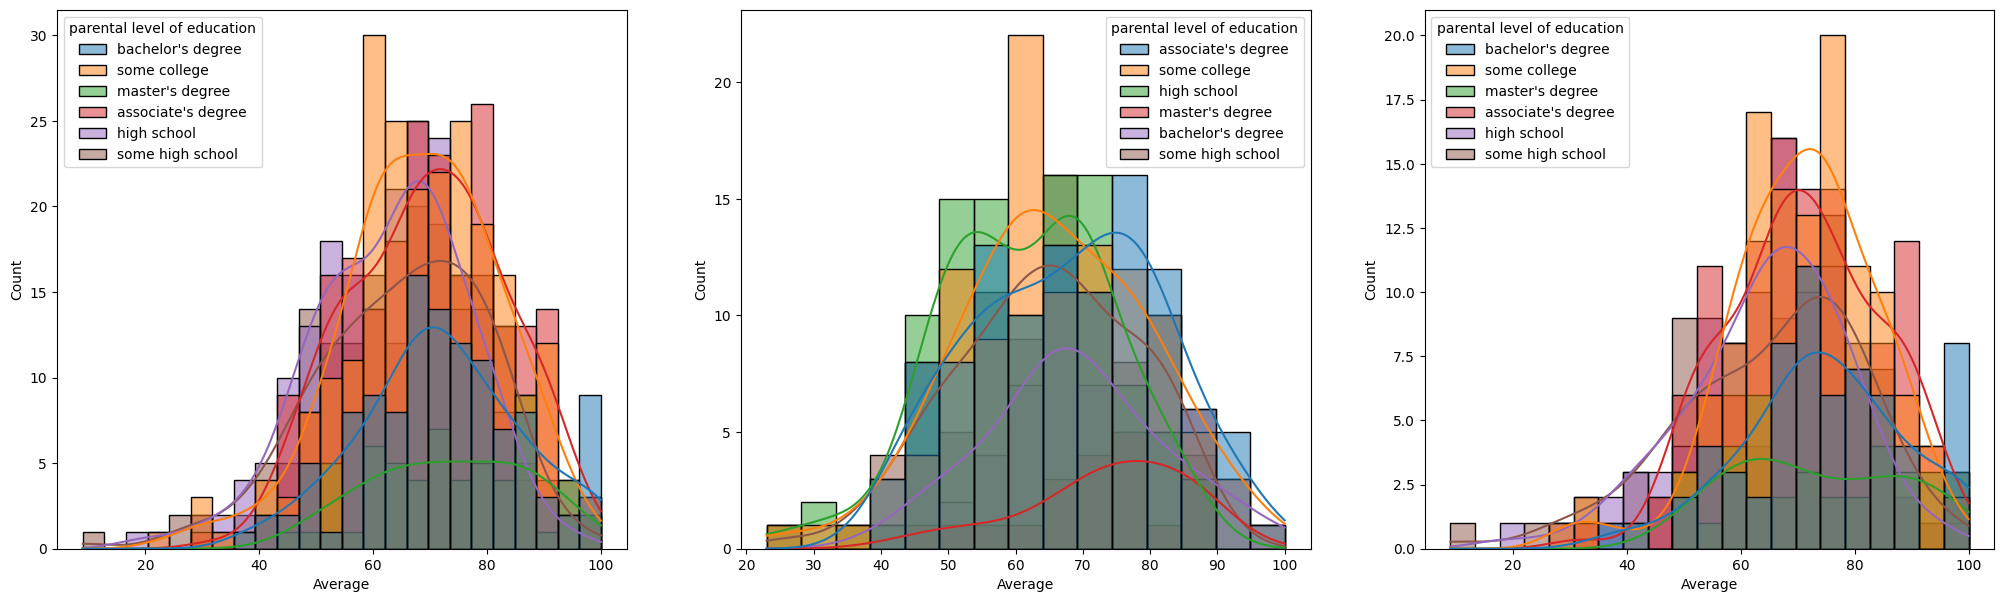

In [24]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x="Average",kde=True,hue="parental level of education")
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=="male"],kde=True,x="Average",hue="parental level of education")
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=="female"],x="Average",kde=True,hue="parental level of education")

# Insights
- In general parent's education is not dependent on the performance of the students
- In the 2rd graph , Parent's whose education is master's or associate degree their male child tend to perform well in exma 
- In the 3rd graph, there is no effect of parental eduction on the female student

<Axes: xlabel='Average', ylabel='Count'>

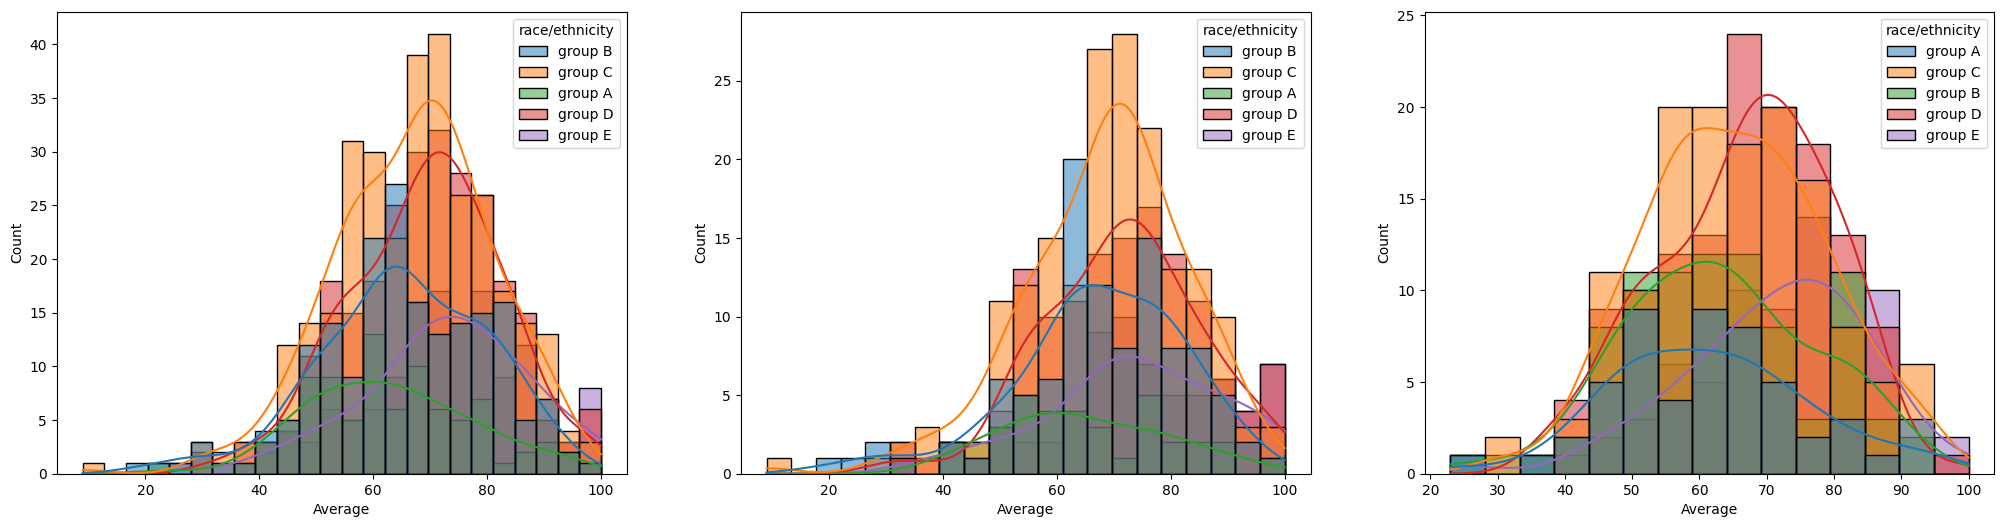

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')

# Insights 
- Students of group A and group B tends to perform poorly in exam 
- Students of group A and group B tends to perform poorly in exam irrespective  of male and female 

# Maximum score of students in all 3 subject 

<Axes: title={'center': 'Writing Score'}, ylabel='writing score'>

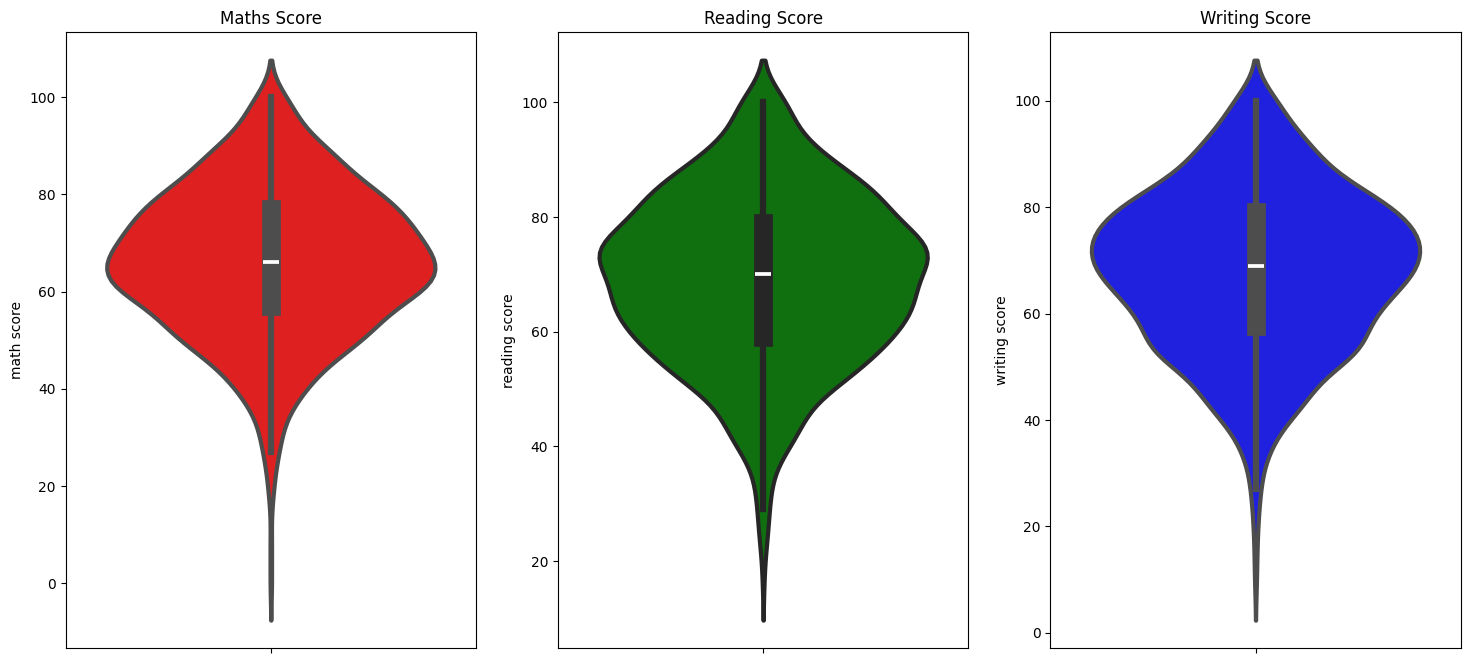

In [30]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(1,3,1)
plt.title("Maths Score")
sns.violinplot(y="math score",data=df,color="Red",linewidth=3)
plt.subplot(1,3,2)
plt.title("Reading Score")
sns.violinplot(y="reading score",data=df,color="Green",linewidth=3)
plt.subplot(1,3,3)
plt.title("Writing Score")
sns.violinplot(y="writing score",data=df,color="blue",linewidth=3)


# Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# Univariate Analysis using pieplot

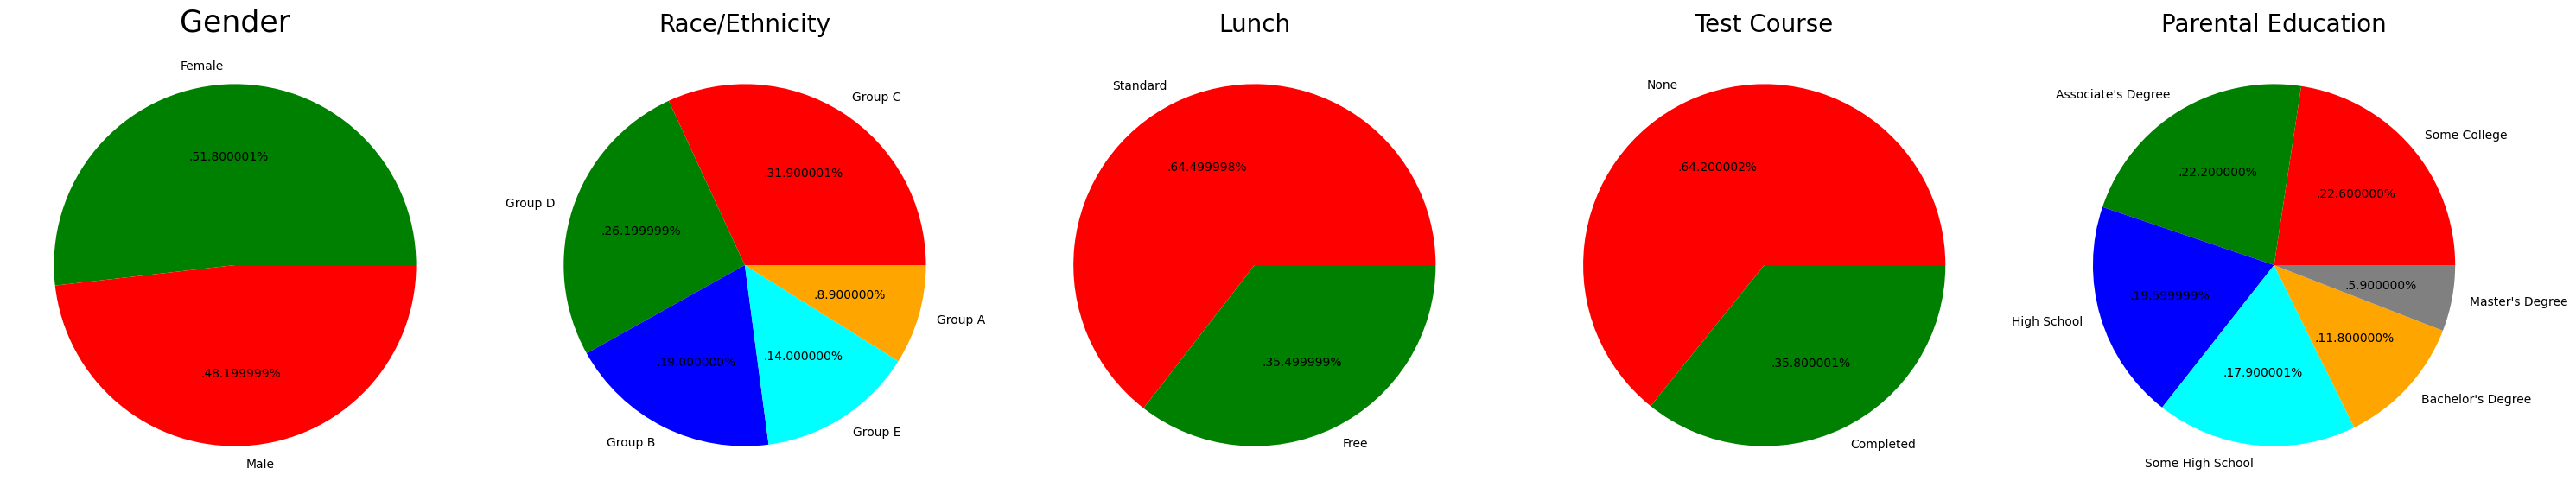

In [32]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size=df["gender"].value_counts()
labels="Female","Male"
colors=["green","red"]

plt.pie(size,labels=labels,colors=colors,autopct=".%2f%%")
plt.title("Gender",fontsize=25)
plt.axis("off")

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

####  Feature Wise Visualization
####  GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

### Univariate Analysis (How is the distribution of gender?)

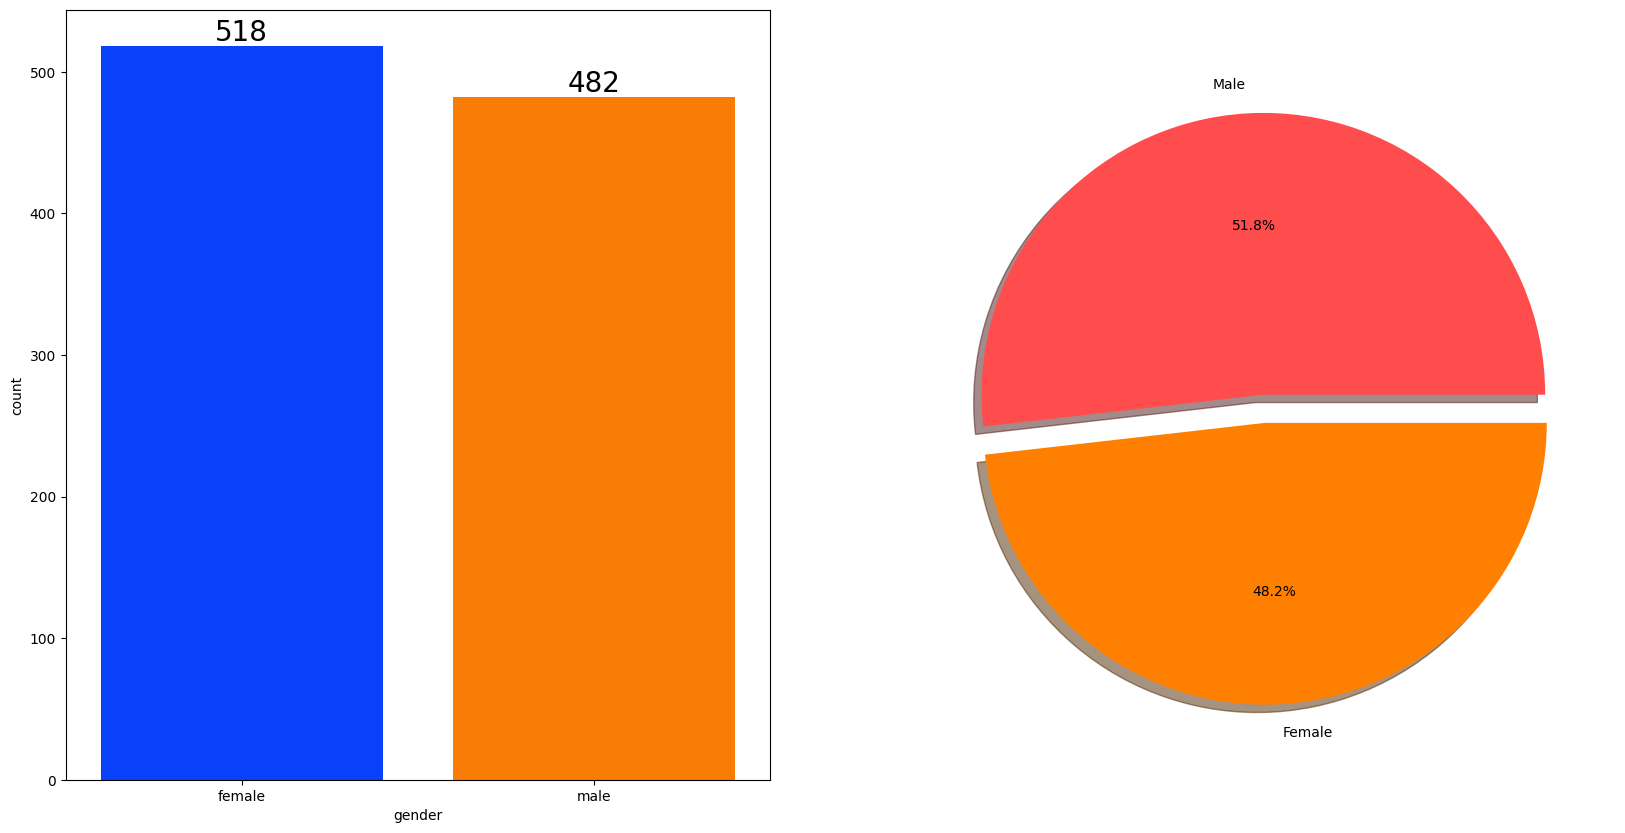

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95,hue="gender")
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

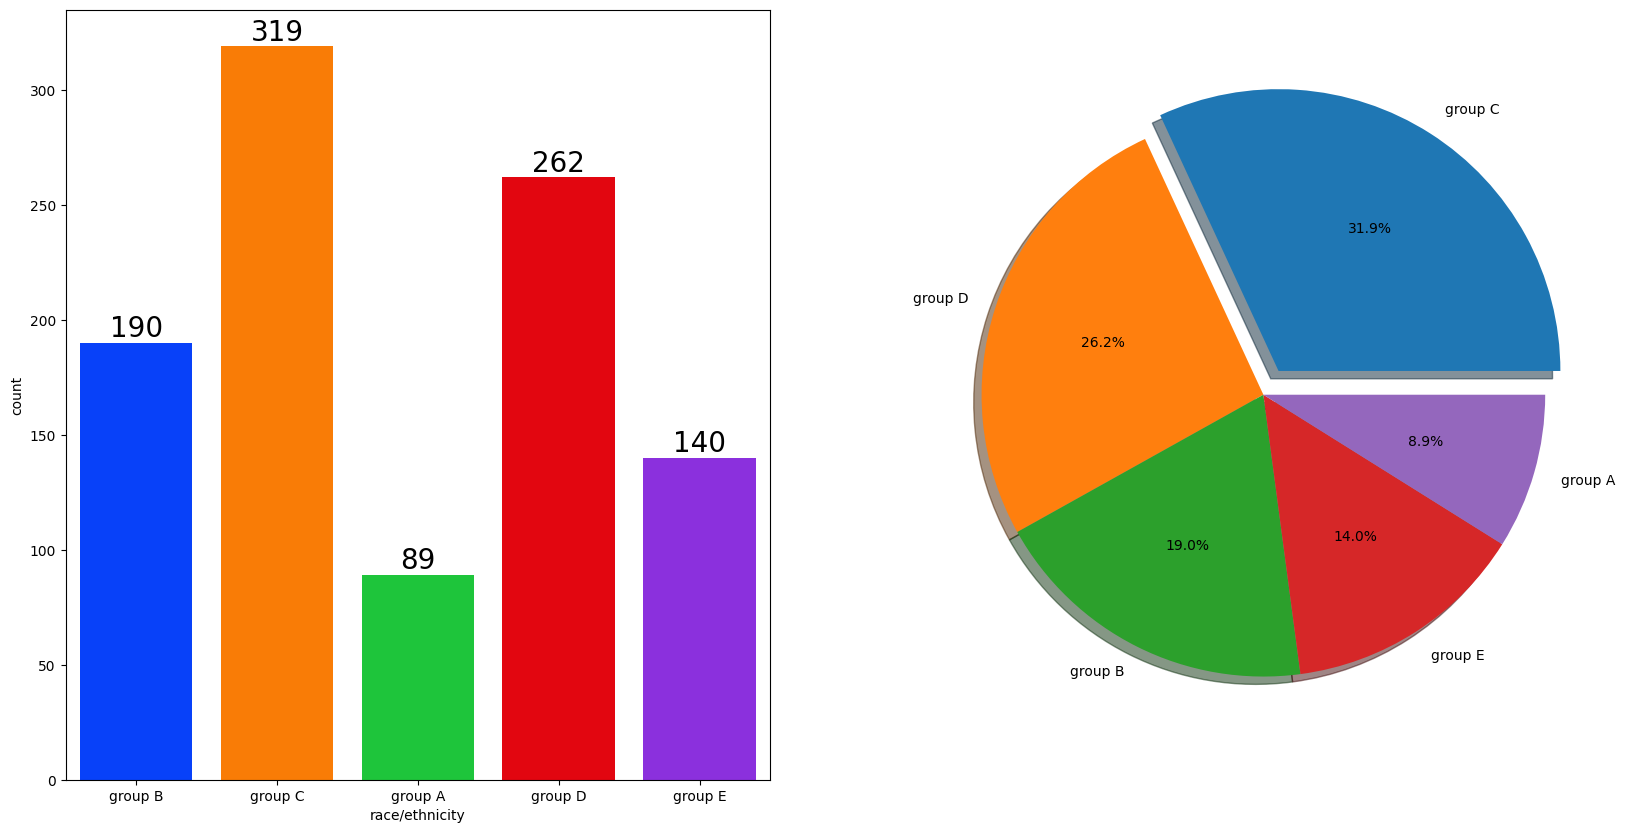

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95,hue="race/ethnicity")
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

C:\Users\Acer\AppData\Local\Temp\ipykernel_9600\3979719510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_9600\3979719510.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_9600\3979719510.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



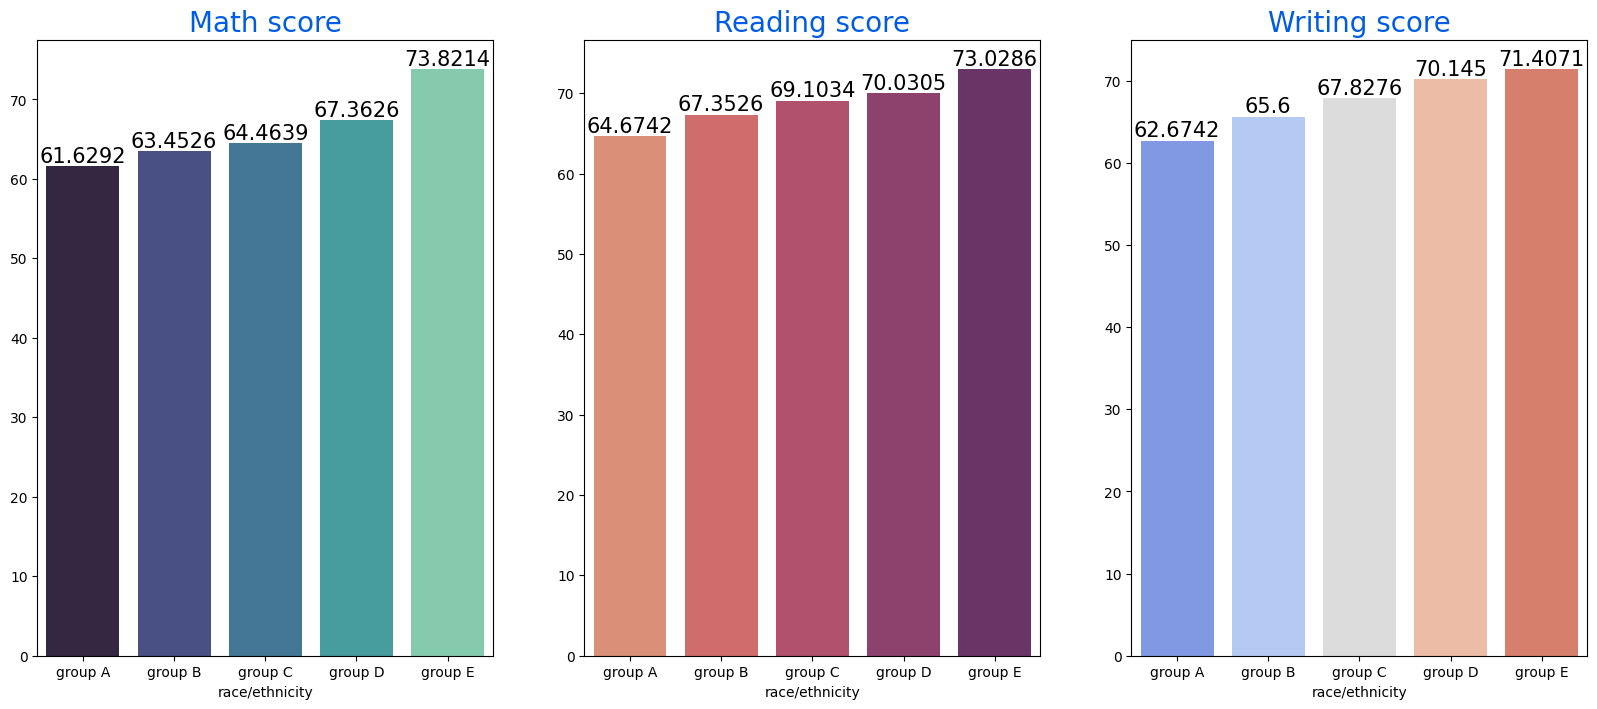

In [47]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

C:\Users\Acer\AppData\Local\Temp\ipykernel_9600\2764336993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental level of education'], palette = 'Blues')


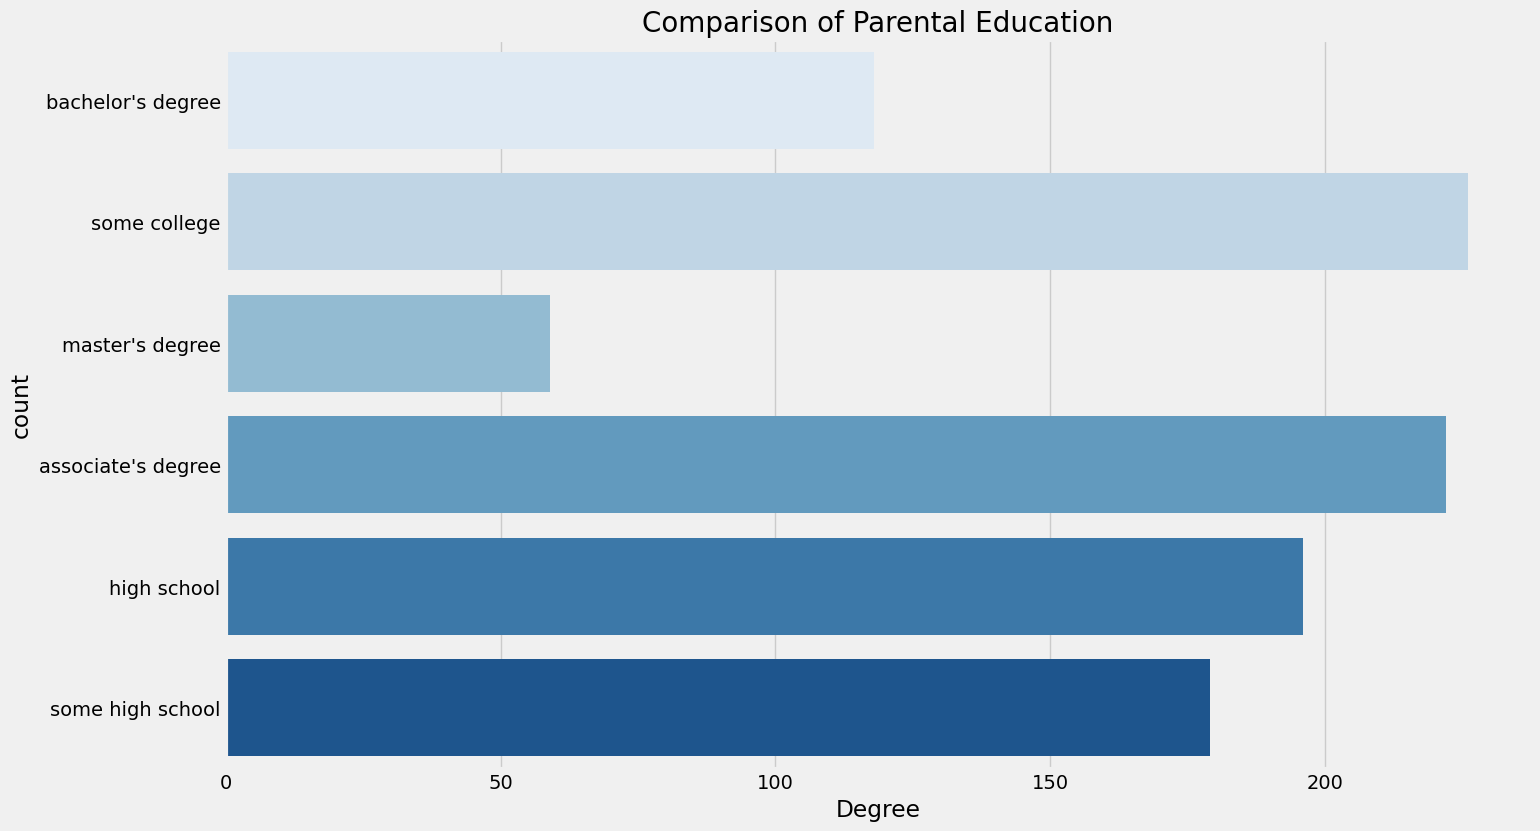

In [48]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

# Lunch column (Univariate analysis)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9600\3431367200.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\Acer\AppData\Local\Temp\ipykernel_9600\3431367200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


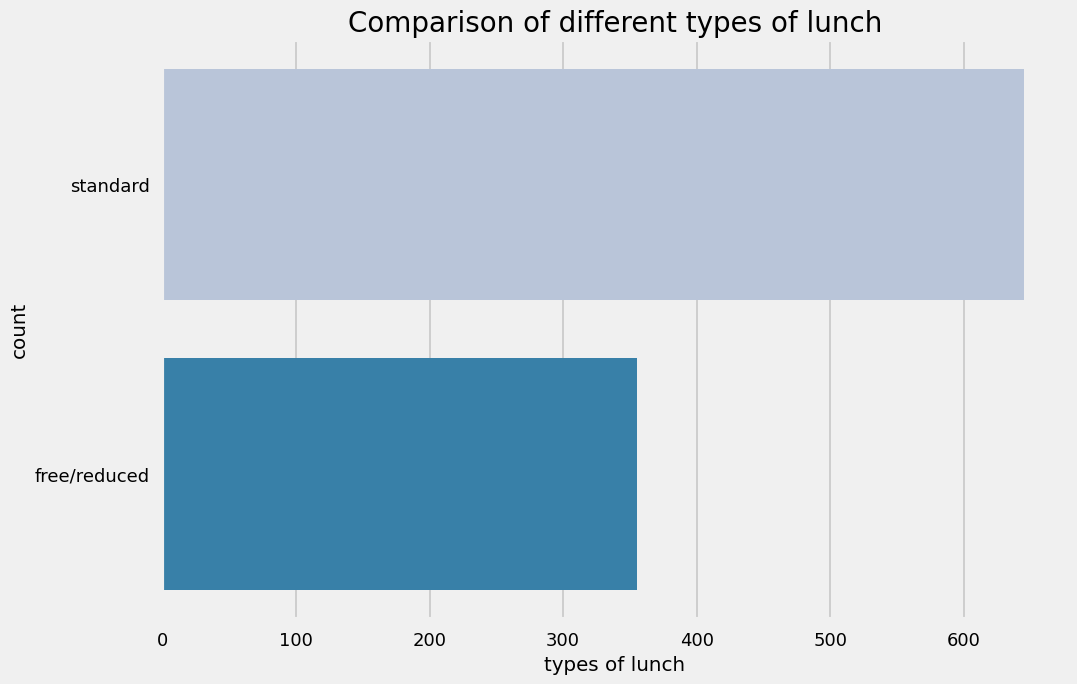

In [51]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### Bivariate analysis

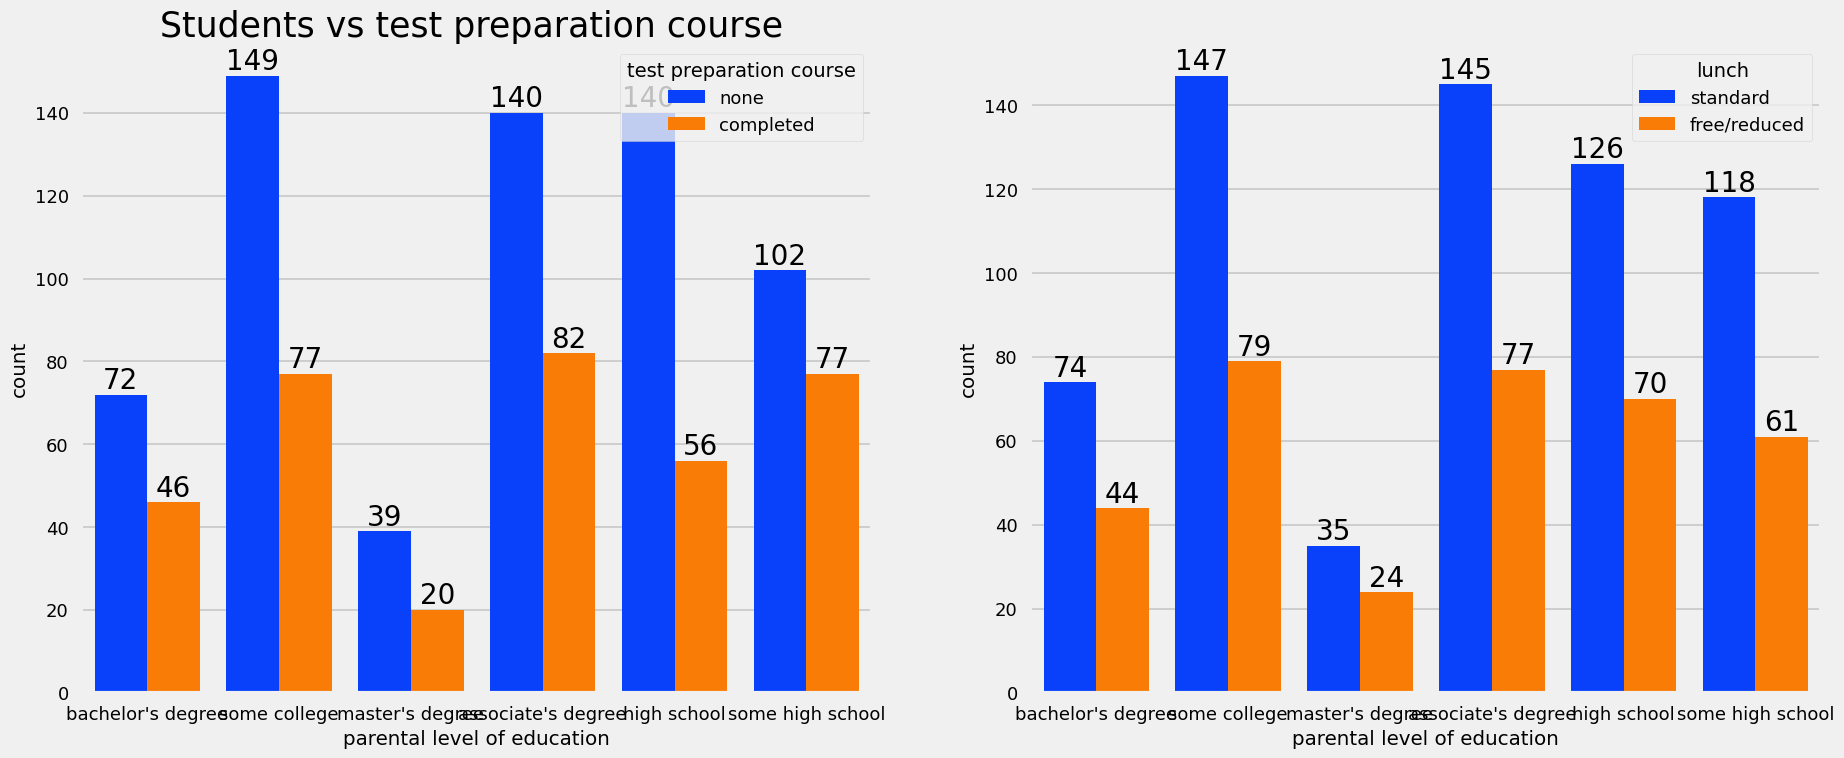

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

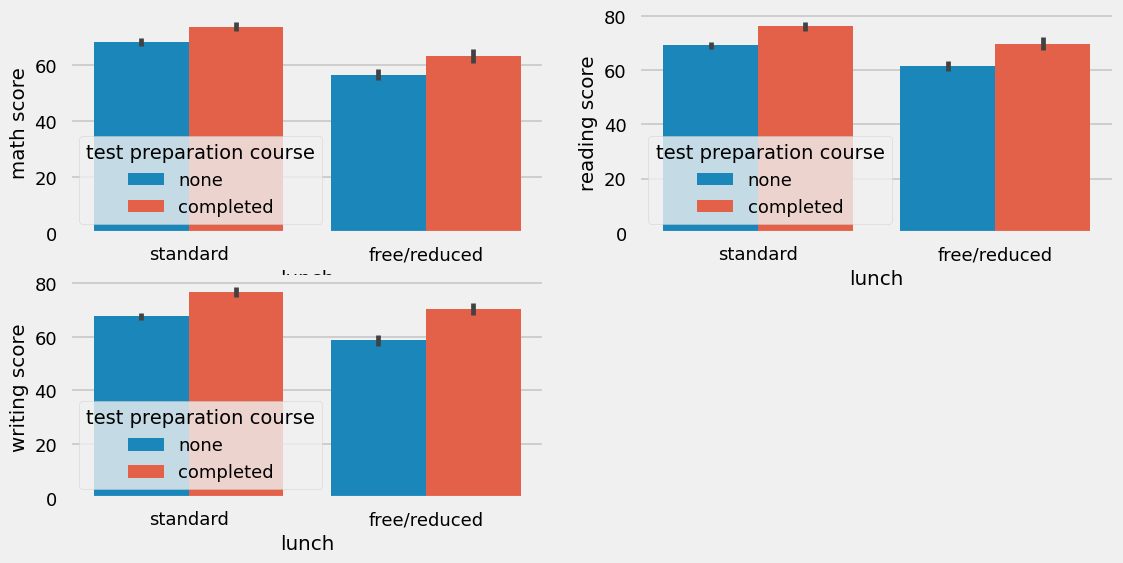

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

# Checking Outliers

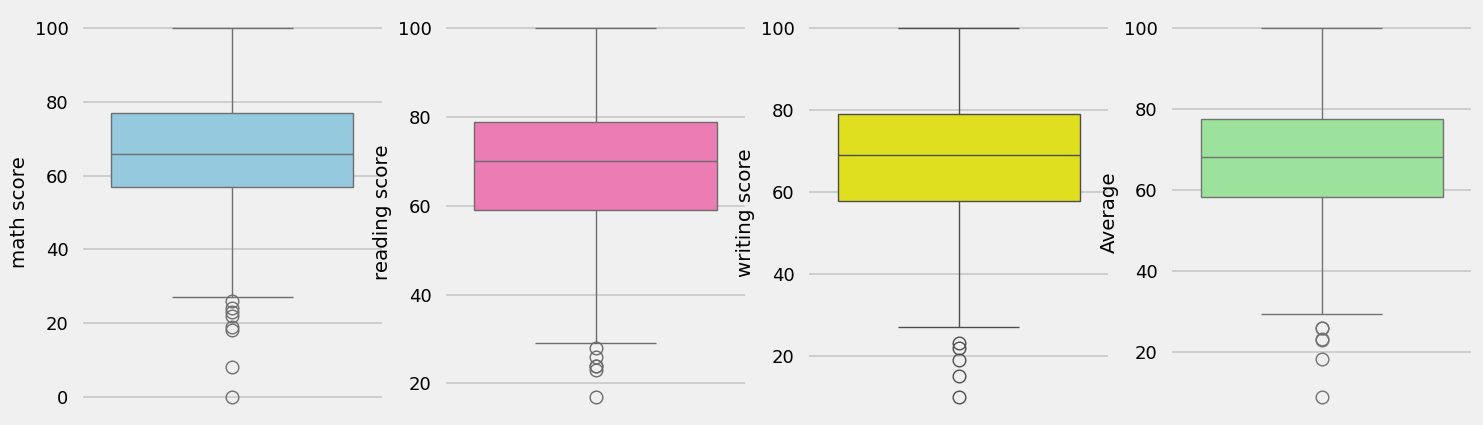

In [55]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

# Multivariate analysis using pairplot

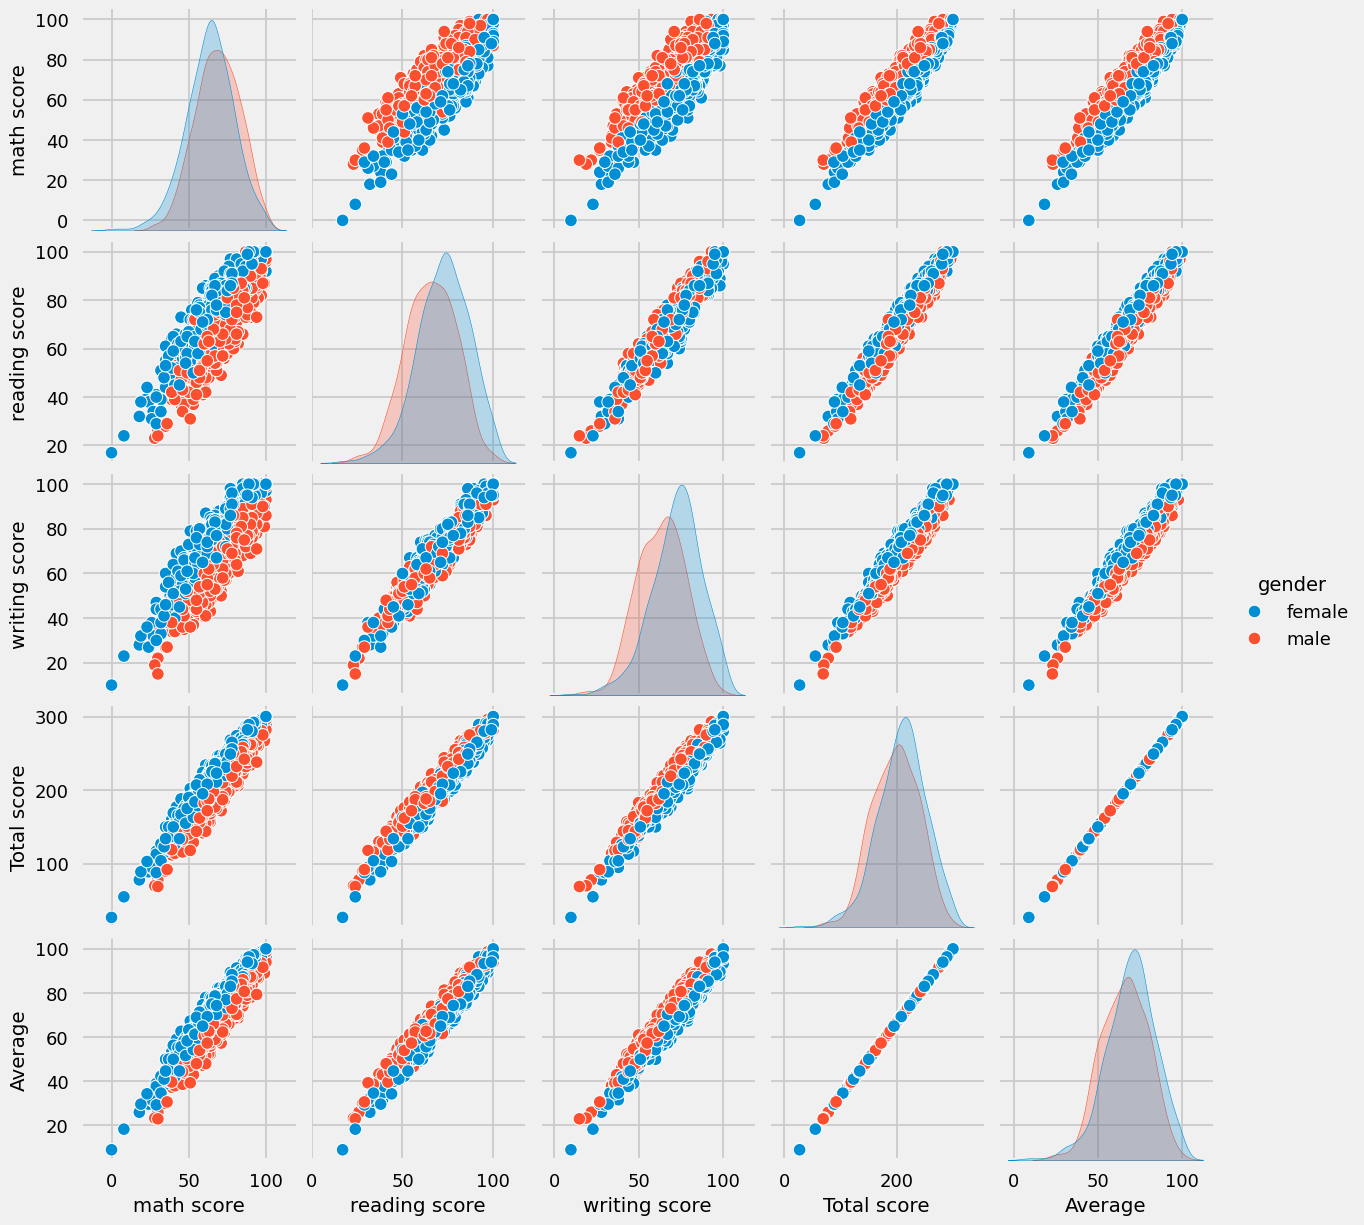

In [56]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [58]:
df.to_csv('data/cleaned.csv', index=False)